# Wasserstein GAN (WGAN) by `Mr. Harshit Dawar!`
* Addresses the following problems of DCGANs
    * Mode Collapse
    * Vanishing Gradient
* It also requires less epochs to provide better results as compared to the DCGANs
* It takes more time to train as compared to DCGANs

In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers as ly
import tensorflow as tf
import os
import time
from IPython import display

## Downloading the Fashion MNIST Dataset, processing it, & visualizing it

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

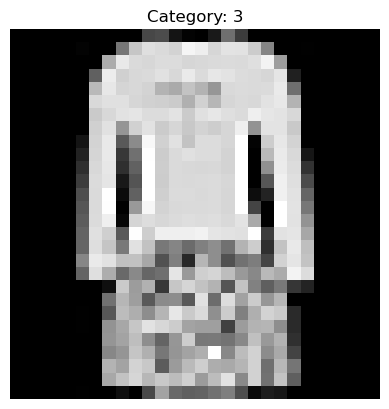

In [4]:
random_image = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[random_image], cmap = "gray")
plt.title("Category: " + str(y_train[random_image]))
plt.axis("off")
plt.show()

In [5]:
# Generating the 3rd Dimenstion for the image as per the requirement of the task
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [6]:
# Normalizing the images between -1 to 1
X_train = (X_train - 127.5) / 127.5

In [7]:
X_train.min(), X_train.max()

(-1.0, 1.0)

In [8]:
batch_size = 64
total_images = X_train.shape[0]
total_number_of_batches = total_images / batch_size

In [9]:
total_number_of_batches

937.5

In [10]:
X_train[0].dtype

dtype('float32')

In [11]:
# Changing the type of X_train from numpy array to tensorflow batchdataset
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(total_images).batch(batch_size)

In [12]:
type(X_train)

tensorflow.python.data.ops.dataset_ops.BatchDataset